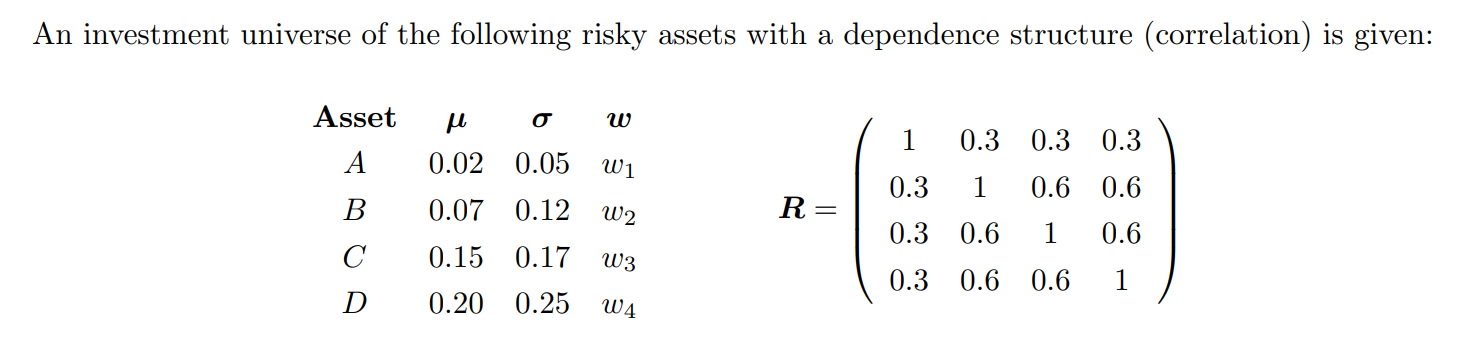

In [34]:
import numpy as np

In [35]:
def optimize_portfolio(mus,stds,R,m='global_min'):
    '''
    Parameters
    ----------
    mus : np.array
        return vector.
    stds : np.array
        standard deviation vector.
    R : np.array
        DESCRIPTION.
    m : 'global_min' or float
        global minimum variance portfolio if return is not specified.
    Returns
    -------
    w_star : np.array
        optimal allocations.
    '''
    dim=R.shape[0]
    unit=np.ones(dim)
    S=np.diag(stds)
    sigma=S.T.dot(R).dot(S)

    A=unit.T.dot(np.linalg.inv(sigma)).dot(unit)
    B=mus.T.dot(np.linalg.inv(sigma)).dot(unit)
    C=mus.T.dot(np.linalg.inv(sigma)).dot(mus)
    if m=='global_min':
        m=B/A
    w_star=1/(A*C-B**2)*np.linalg.inv(sigma).dot((A*mus-B*unit)*m+(C*unit-B*mus))
        
    return w_star

In [36]:
print(optimize_portfolio(mus, stds, R, m='global_min'))

[ 0.9426708   0.11195005 -0.00606273 -0.04855812]


Q1 Formulate the Lagrangian and give its partial derivatives.
$$
\begin{aligned}
& \Large L(w,\lambda, \gamma)=\frac{1}{2}w^T \Sigma w + \lambda (m- w^Tu) + \gamma (1_{N}-w^T 1_{N}) \\
& \Large \frac{\partial L}{\partial w}(w,\lambda, \gamma)=\Sigma w - \lambda u - \gamma 1_{N}
\end{aligned}
$$

Write down the analytical solution for optimal allocations w∗
(derivation not required).
$$
\begin{aligned}
& \Large A=1_{N}^T \Sigma ^{-1} 1_{N} \\
& \Large B=u^T \Sigma ^{-1} 1_{N} = 1_{N}^T \Sigma ^{-1} u \\
& \Large C=u^T \Sigma ^{-1} u \\
& \Large m=\frac{B}{A} \\
\end{aligned}
$$

$$
\begin{aligned}
\Large w^* &=\frac{1}{AC-B^2} \Sigma ^{-1} [(Au-B 1_{N})m+(C 1_{N}-Bu)] \\
&=\frac{\Sigma ^{-1}1_{N}}{A} \\
&=[ 0.9426708 ,  0.11195005, -0.00606273, -0.04855812]
\end{aligned}
$$

Inverse optimisation: generate above 700 random allocation sets (vectors) 4 × 1, those will not be
optimal allocations.

In [37]:
ws=[np.random.random(4) for _ in range(700)]  ##700 random allocation sets

Standardise each set to satisfy $w^T 1_{N}$ = 1, in fact you can generate 3 allocations and compute the 4th.

In [ ]:
ws_norm=list(map(lambda x:x/sum(x),ws))       ##700 random allocation sets which  satisfy w1 = 1

For each vector of allocations compute $u_{\pi}=w^T u$ and $\sigma_{\pi}=\sqrt{w^T \Sigma w}$

In [50]:
mus_port=list(map(lambda w:w.T.dot(mus),ws_norm)) 
stds_port=list(map(lambda w:np.sqrt(w.T.dot(sigma).dot(w)),ws_norm)) 

Plot the cloud of points of $u_{\pi}$ vertically on $\sigma_{\pi}$ horizontally. Explain this plot.

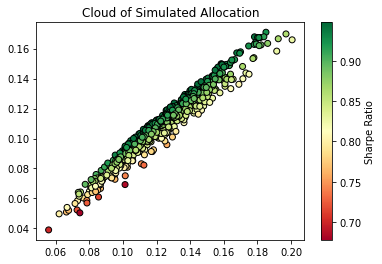

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.set_title('Cloud of Simulated Allocation')
fig.colorbar(ax.scatter(stds_port, mus_port, c=np.array(mus_port) / np.array(stds_port), 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 